# Autoencoders
## Tensorflow version

In [37]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

In [14]:
from tensorflow.keras import layers, losses, Model
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

11490434/11490434 [==============================] - 20s 2us/step
(60000, 28, 28)
(10000, 28, 28)


In [27]:
latent_dim = 32 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [28]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [29]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0256 - val_loss: 0.0147
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0130 - val_loss: 0.0111
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.007

In [32]:
latent_dim = 64 

class Autoencoder1(Model):
    def __init__(self, latent_dim):
        super(Autoencoder1, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),

            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder1 = Autoencoder1(latent_dim)

In [33]:
autoencoder1.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [34]:
autoencoder1.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - val_loss: 0.0090
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0069 - val_loss: 0.0054
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.004

In [35]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

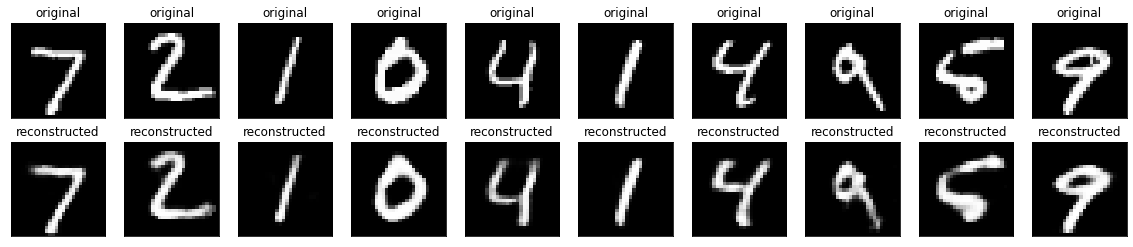

In [38]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

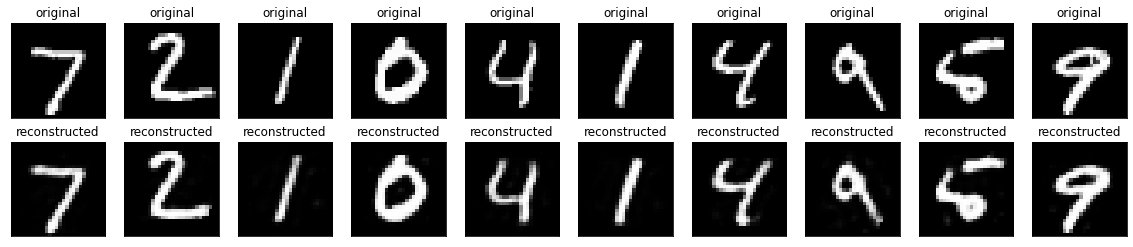

In [39]:
encoded_imgs = autoencoder1.encoder(x_test).numpy()
decoded_imgs = autoencoder1.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()